In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',1000)
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
import os
path=os.getcwd()[:-34]+"Data/digits_train_sample.csv"

In [4]:
"""Conjunto de imagenes de numeros a mano"""
data_mnist= pd.read_csv(path)

In [5]:
data_mnist.head() #Imagen en escala a grises, valores de los pixeles de 0 a 255

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,

In [6]:
data_mnist.shape

(6000, 785)

In [7]:
data_mnist.describe(np.arange(.1,1,.1))

label     1x1     1x2     1x3     1x4     1x5     1x6     1x7  \
count  6000.0000  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0   
mean      4.5155     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.9111     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10%       0.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20%       1.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30%       2.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40%       3.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       5.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
60%       6.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
70%       7.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
80%       8.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
90%       8.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.0000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

          1x8     1x9    1x10    1x11    1x12    1x13    1x14    1x15    1x16  \
count  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
60%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
70%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
80%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
90%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         1x17    1x18    1x19    1x20    1x21    1x22    1x23    1x24    1x25  \
count  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
30%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
40%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
60%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
70%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
80%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
90%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         1x26    1x27    1x28     2x1     2x2     2x3     2x4     2x5     2x6  \
count  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0  6000.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
10%       0.0     0.0     0.0    

In [8]:
data_mnist['label'].value_counts() #Ya tenemos los etiquetados

7    677
1    671
8    628
0    603
9    594
6    591
3    583
2    567
4    546
5    540
Name: label, dtype: int64

In [9]:
data_mnist['label'].value_counts()

7    677
1    671
8    628
0    603
9    594
6    591
3    583
2    567
4    546
5    540
Name: label, dtype: int64

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

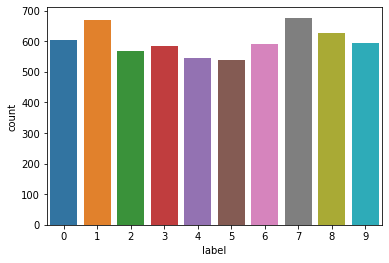

In [10]:
sns.countplot(data_mnist["label"]) #Distribucion de clases

In [11]:
three =data_mnist.iloc[0, 1:]

In [12]:
three.values.reshape(28,28) #Se reordena la matriz en un tamaño de 28 x 28

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  74, 181, 255, 215,
        171,  59,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Text(0.5, 1.0, 'Digit 3')

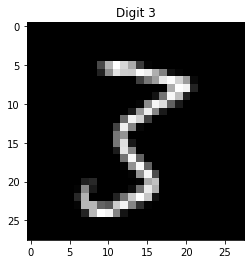

In [13]:
three = data_mnist.iloc[0, 1:]
three = three.values.reshape(28,28)
plt.imshow(three, cmap='gray')
plt.title("Digit 3")

## PCA

In [14]:
"""Tecnicas de visualizacion"""
X=data_mnist.iloc[:,1:] #Tomamos todo menos label
X = X/255.0 #Estandarizacion de los datos

In [15]:
X.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,2x13,2x14,2x15,2x16,2x17,2x18,2x19,2x20,2x21,2x22,2x23,2x24,2x25,2x26,2x27,2x28,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,3x10,3x11,3x12,3x13,3x14,3x15,3x16,3x17,3x18,3x19,3x20,3x21,3x22,3x23,3x24,3x25,3x26,3x27,3x28,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,4x10,4x11,4x12,4x13,4x14,4x15,4x16,4x17,4x18,4x19,4x20,4x21,4x22,4x23,4x24,4x25,4x26,4x27,4x28,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,5x10,5x11,5x12,5x13,5x14,5x15,5x16,5x17,5x18,5x19,5x20,5x21,5x22,5x23,5x24,5x25,5x26,5x27,5x28,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,6x10,6x11,6x12,6x13,6x14,6x15,6x16,6x17,6x18,6x19,6x20,6x21,6x22,6x23,6x24,6x25,6x26,6x27,6x28,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,7x10,7x11,7x12,7x13,7x14,7x15,7x16,7x17,7x18,7x19,7x20,7x21,7x22,7x23,7x24,7x25,7x26,7x27,7x28,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,8x15,8x16,8x17,8x18,8x19,8x20,8x21,8x22,8x23,8x24,8x25,8x26,8x27,8x28,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9,9x10,9x11,9x12,9x13,9x14,9x15,9x16,9x17,9x18,9x19,9x20,9x21,9x22,9x23,9x24,9x25,9x26,9x27,9x28,10x1,10x2,10x3,10x4,10x5,10x6,10x7,10x8,10x9,10x10,10x11,10x12,10x13,10x14,10x15,10x16,10x17,10x18,10x19,10x20,10x21,10x22,10x23,10x24,10x25,10x26,10x27,10x28,11x1,11x2,11x3,11x4,11x5,11x6,11x7,11x8,11x9,11x10,11x11,11x12,11x13,11x14,11x15,11x16,11x17,11x18,11x19,11x20,11x21,11x22,11x23,11x24,11x25,11x26,11x27,11x28,12x1,12x2,12x3,12x4,12x5,12x6,12x7,12x8,12x9,12x10,12x11,12x12,12x13,12x14,12x15,12x16,12x17,12x18,12x19,12x20,12x21,12x22,12x23,12x24,12x25,12x26,12x27,12x28,13x1,13x2,13x3,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13,13x14,13x15,13x16,13x17,13x18,13x19,13x20,13x21,13x22,13x23,13x24,13x25,13x26,13x27,13x28,14x1,14x2,14x3,14x4,14x5,14x6,14x7,14x8,14x9,14x10,14x11,14x12,14x13,14x14,14x15,14x16,14x17,14x18,14x19,14x20,14x21,14x22,14x23,14x24,14x25,14x26,14x27,14x28,15x1,15x2,15x3,15x4,15x5,15x6,15x7,15x8,15x9,15x10,15x11,15x12,15x13,15x14,15x15,15x16,15x17,15x18,15x19,15x20,15x21,15x22,15x23,15x24,15x25,15x26,15x27,15x28,16x1,16x2,16x3,16x4,16x5,16x6,16x7,16x8,16x9,16x10,16x11,16x12,16x13,16x14,16x15,16x16,16x17,16x18,16x19,16x20,16x21,16x22,16x23,16x24,16x25,16x26,16x27,16x28,17x1,17x2,17x3,17x4,17x5,17x6,17x7,17x8,17x9,17x10,17x11,17x12,17x13,17x14,17x15,17x16,17x17,17x18,17x19,17x20,17x21,17x22,17x23,17x24,17x25,17x26,17x27,17x28,18x1,18x2,18x3,18x4,18x5,18x6,18x7,18x8,18x9,18x10,18x11,18x12,18x13,18x14,18x15,18x16,18x17,18x18,18x19,18x20,18x21,18x22,18x23,18x24,18x25,18x26,18x27,18x28,19x1,19x2,19x3,19x4,19x5,19x6,19x7,19x8,19x9,19x10,19x11,19x12,19x13,19x14,19x15,19x16,19x17,19x18,19x19,19x20,19x21,19x22,19x23,19x24,19x25,19x26,19x27,19x28,20x1,20x2,20x3,20x4,20x5,20x6,20x7,20x8,20x9,20x10,20x11,20x12,20x13,20x14,20x15,20x16,20x17,20x18,20x19,20x20,20x21,20x22,20x23,20x24,20x25,20x26,20x27,20x28,21x1,21x2,21x3,21x4,21x5,21x6,21x7,21x8,21x9,21x10,21x11,21x12,21x13,21x14,21x15,21x16,21x17,21x18,21x19,21x20,21x21,21x22,21x23,21x24,21x25,21x26,21x27,21x28,22x1,22x2,22x3,22x4,22x5,22x6,22x7,22x8,22x9,22x10,22x11,22x12,22x13,22x14,22x15,22x16,22x17,22x18,22x19,22x20,22x21,22x22,22x23,22x24,22x25,22x26,22x27,22x28,23x1,23x2,23x3,23x4,23x5,23x6,23x7,23x8,23x9,23x10,23x11,23x12,23x13,23x14,23x15,23x16,23x17,23x18,23x19,23x20,23x21,23x22,23x23,23x24,23x25,23x26,23x27,23x28,24x1,24x2,24x3,24x4,24x5,24x6,24x7,24x8,24x9,24x10,24x11,24x12,24x13,24x14,24x15,24x16,24x17,24x18,24x19,24x20,24x21,24x22,24x23,24x24,24x25,24x26,24x27,24x28,25x1,25x2,25x3,25x4,25x5,25x6,25x7,25x8,25x9,25x10,25x11,25x12,25x13,25x14,25x15,25x16,25x17,25x18,25x19,25x20,25x21,25x22,25x23,25x24,25x25,25x26,25x27,25x28,26x1,26x2,26x3,26x4,26x5,26x6,26x7,26x8,26x9,26x10,26x11,26x12,26x13,26x14,26x15,26x16,26x17,26x18,26x19,26x20,26x21,26x22,26x23,26x24,26x25,26x26,26x27,26x28,27x1,27x2,27x3,27x4,27x5,27x6,27x7,27x8,27x9,27x10,27x11,27x12,27x13,27x14,27x15,27x16,27x17,27x18,27x19,27x20,27x21,

In [16]:
PCA?

In [17]:
pca=PCA(n_components=2)

In [18]:
pca.fit(X) #Hacemos el entrenamiento

PCA(n_components=2)

In [19]:
pca.explained_variance_ratio_ #Vemos que no hay una gran proporcion de la varianza

array([0.09808013, 0.07217455])

In [20]:
pca.explained_variance_ratio_.cumsum()

array([0.09808013, 0.17025468])

In [21]:
Xp = pd.DataFrame(pca.transform(X),columns=['p1','p2'])

In [22]:
Xp.corr()

,p1,p2
p1,1.000000e+00,6.098552e-10
p2,6.098552e-10,1.000000e+00


In [23]:
Xp #Tranformacion de los datos para reduccion

,p1,p2
0,-2.041931,-1.429107
1,-0.214063,0.556427
2,-1.872679,0.333889
3,-0.756886,-0.847001
4,6.732332,0.434371
...,...,...
5995,1.386191,-0.037654
5996,1.177405,-0.915068
5997,0.440921,0.133976
5998,3.553898,1.176136


In [24]:
Xp['label'] = data_mnist['label']

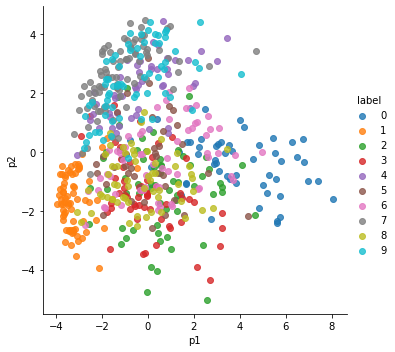

In [25]:
#Vemos si existe una relacion, se hace con una muestra
sns.lmplot(data=Xp.sample(frac=0.1),x='p1',y='p2',fit_reg=False,hue='label')
#Esta visualizacion no nos da tanta luz, porque no se ven esos 10 grupos

## MDS 

In [26]:
mds = MDS(n_components=2,n_jobs=-1) #Intanciamos

In [27]:
X_sample=X.sample(frac=.25) #Creacion de la muestra cuidado por el tiempo de procesamiento

In [28]:
Xm  = pd.DataFrame(mds.fit_transform(X_sample),columns=['d1','d2'])

In [29]:
Xm['label'] = data_mnist['label']

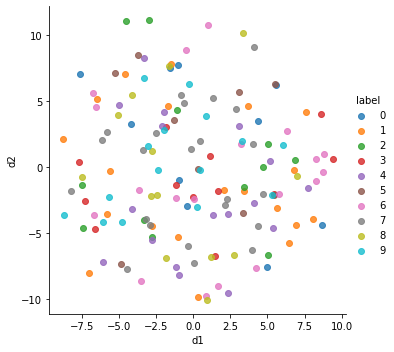

In [30]:
sns.lmplot(data=Xm.sample(frac=0.1),x='d1',y='d2',fit_reg=False,hue='label')
#No hay mucha luz acerca del gráfico para tener de guia para modelacion supervisada

## T-SNE

In [31]:
tsne = TSNE(n_components=2, perplexity=20)
"""En T-SNE esta el parametro de la varianza dado por perplexity (numero
de puntos cercanos al punto), los valores bueno son entre el 5 y 50, pero
puede variar."""

'En T-SNE esta el parametro de la varianza dado por perplexity (numero\nde puntos cercanos al punto), los valores bueno son entre el 5 y 50, pero\npuede variar.'

In [32]:
Xt  = pd.DataFrame(tsne.fit_transform(X),columns=['t1','t2'])
#Si se tarda mucho es recomendable usar una muestra

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [33]:
Xt['label'] = data_mnist['label']

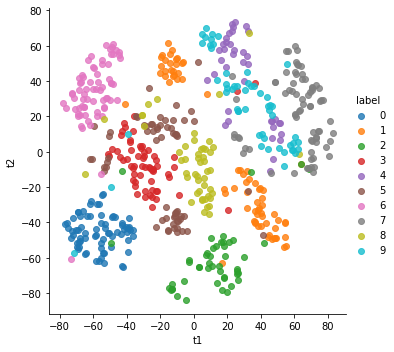

In [34]:
sns.lmplot(data=Xt.sample(frac=0.1),x='t1',y='t2',fit_reg=False,hue='label')
#Hacemos el grafico de la visualizacion y podemos darnos cuenta que es la
#mejor visualizacion

In [35]:
tsne.kl_divergence_ #Divergencia de kurbal

1.677176833152771

In [36]:
mds.dissimilarity_matrix_ #Matriz de distancias

array([[ 0.        ,  8.77466908, 10.97736443, ..., 10.47331976,
        10.10421285, 12.42908125],
       [ 8.77466908,  0.        ,  8.90814072, ...,  8.28866552,
         9.25351352, 11.73502793],
       [10.97736443,  8.90814072,  0.        , ...,  9.55731813,
         9.28966055, 10.95538399],
       ...,
       [10.47331976,  8.28866552,  9.55731813, ...,  0.        ,
        10.04323679,  9.76129084],
       [10.10421285,  9.25351352,  9.28966055, ..., 10.04323679,
         0.        , 11.77400613],
       [12.42908125, 11.73502793, 10.95538399, ...,  9.76129084,
        11.77400613,  0.        ]])

In [37]:
mds.dissimilarity_matrix_.shape

(1500, 1500)

Nos quedamos con TSNE, los ejemplos anteriores son para visualizacion